<a href="https://colab.research.google.com/github/nishitpatell/RegressionAlgorithm/blob/main/RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset = pd.DataFrame(df.data)

In [4]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
dataset.columns = df.feature_names

In [6]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
dataset['Price'] = df.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Preprocessing

In [8]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [11]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Linear Reg

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [14]:
mse

array([-0.52006533, -0.50229277, -0.52054451, -0.50789718, -0.54552622])

In [15]:
mean_mse = np.mean(mse)
mean_mse

np.float64(-0.519265201143368)

In [16]:
from sklearn.metrics import r2_score
lin_reg.fit(X_train, y_train)

y_pred_temp = lin_reg.predict(X_test) # These are the predicted prices for unseen data.
r2_temp = r2_score(y_test,y_pred_temp)
print("R2 Score:", r2_temp)

R2 Score: 0.5757877060324508


## Ridge Regression

#### Standardize Features (critical for Ridge!)


In [17]:
#Standardize Features (critical for Ridge!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Ridge Reg

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha': [1e-10, 1e-8, 1e-3, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}
ridge_reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

In [19]:
ridge_reg.fit(X_train_ridge, y_train_ridge)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5, 10, 20,
                                   50, 100]},
             scoring='neg_mean_squared_error')

In [20]:
from sklearn.metrics import r2_score
y_pred_ridge = ridge_reg.predict(X_test_ridge)
r2_score(y_test_ridge, y_pred_ridge)

0.575818534544132

## Ridge after performing feature selection

In [21]:
newDS = dataset
newDS.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
newDS['Room_To_Bed_Ratio'] = newDS['AveRooms']/newDS['AveBedrms']

In [24]:
newDS.drop(['AveRooms', 'AveBedrms', 'AveOccup'], axis = 1, inplace = True)

In [25]:
newDS.head()

,MedInc,HouseAge,Population,Latitude,Longitude,Price,Room_To_Bed_Ratio
0,8.3252,41.0,322.0,37.88,-122.23,4.526,6.821705
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,6.418626
2,7.2574,52.0,496.0,37.85,-122.24,3.521,7.721053
3,5.6431,52.0,558.0,37.85,-122.25,3.413,5.421277
4,3.8462,52.0,565.0,37.85,-122.25,3.422,5.810714


In [26]:
X_new = newDS.drop('Price', axis=1)
y_new = newDS['Price']

In [27]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

In [28]:
ridge_reg_new = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

In [29]:
ridge_reg.fit(X_new_train, y_new_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5, 10, 20,
                                   50, 100]},
             scoring='neg_mean_squared_error')

In [30]:
y_pred_ridge_new = ridge_reg.predict(X_new_test)
r2_score(y_new_test, y_pred_ridge_new)

0.5919658754577748

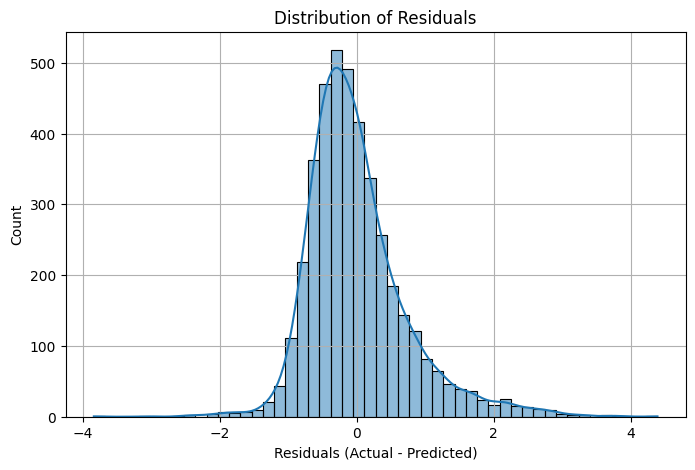

In [32]:
residuals = y_new_test - y_pred_ridge_new

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid()